# Model interpretation

This page discusses ways to interpret machine learning models to understand why they make different decisions.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.ensemble
import sklearn.inspection
import sklearn.linear_model

## Permutation importance

To estimate features importances of the arbitrary model you can use permutation importance algorithm. The idea is to randomly change some features of the input, and estimate a change of the model's quality measure - big change means that feature was important. For more details check ["Permutation feature importance"](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-feature-importance), page on sklearn.

---

The code in the following cell creates a small $X \rightarrow y$ relationship dataset, so that each next column has a greater impact on the result than the previous one.

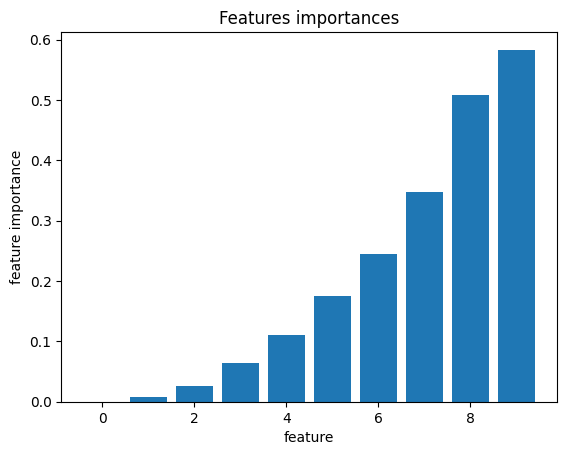

In [3]:
features_numer = 10
sample_size = 500

X = np.random.uniform(-5, 5, (sample_size, features_numer))
y = (X @ np.arange(features_numer))

model = sklearn.linear_model.LinearRegression().fit(X=X, y=y)

from sklearn.inspection import permutation_importance
importances = permutation_importance(
    estimator=model, X=X, y=y, scoring="r2"
)["importances_mean"]

plt.bar(range(importances.shape[0]), importances)
plt.xlabel("feature"), plt.ylabel("feature importance")
plt.title("Features importances")
plt.show()

As a result, other features have a greater impact on the outcome.

## Partial dependence plot

A partial dependence plot (PDP) shows how the model's output change with different values of the feature. 

---

The following cell generates a regression task in which $y$ depends on $x_1$ and $x_2$. However, the relationship with $x_2$ is always linear. With $x_1$ it is linear until $x_1$ reaches 10, after becomes quadratic.

In [ ]:
np.random.seed(2000)

sample_size = 200
X = np.stack(
    [
        np.random.normal(10, 20, sample_size),
        np.random.normal(10, 20, sample_size)
    ],
    axis=1
)

y = np.where(X[:, 0] < 10, X[:, 0] * 5, X[:, 0] ** 2) + 5 * X[:, 1]

The following cell fits the Gradient boosting regressor based on the generated task,and explains how features influence on the model using PDP.

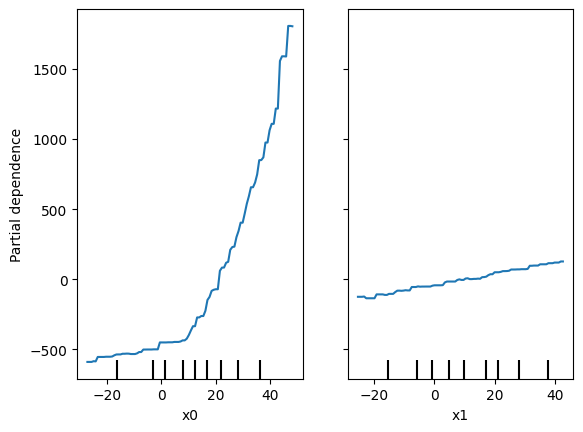

In [ ]:
model = sklearn.ensemble.GradientBoostingRegressor().fit(X, y)
sklearn.inspection.PartialDependenceDisplay.from_estimator(model, X, features=[0, 1])